<a href="https://colab.research.google.com/github/suyog568/myfiles/blob/main/Workshop_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name : Suyog Bastakoti

#University ID: 2407093

#Module Name: Concepts & Technologies of AI

3 To - Do - Task
Please Complete all the problem listed below.
3.1 Warming Up Exercises - Basic Inspection and Exploration:
Problem 1 - Data Read, Write and Inspect:
Complete all following Task:
• Dataset for the Task: "bank.csv"

1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column.
3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”
4. Read ”banknumericdata.csv” and Find the summary statistics.

In [14]:
# 1. Load the provided dataset and import in pandas DataFrame.
df = pd.read_csv('/content/drive/MyDrive/Data Set /bank .csv')

# 2. Check info of the DataFrame and identify following:

# (a) columns with dtypes=object
object_columns = df.select_dtypes(include=['object']).columns
print(f"Columns with dtype = object:\n {list(object_columns)}\n")

# (b) unique values of those columns.
unique_values = {}
for col in object_columns:
    unique_values[col] = df[col].unique()

print("Unique values for object dtype columns:\n")

for col, values in unique_values.items():
    print(f"{col}: {values}")

# (c) check for the total number of null values in each column.
null_values = df.isnull().sum()
print("\nNull values in each column:\n")
print(null_values)

# 3. Drop columns with dtype=object and store the resulting DataFrame in "banknumericdata.csv"
df_numeric = df.drop(columns=object_columns)
df_numeric.to_csv('/content/drive/MyDrive/Data Set /banknumericdata.csv')

# 4. Read "banknumericdata.csv" and find the summary statistics
df_numeric_read = pd.read_csv('/content/drive/MyDrive/Data Set /banknumericdata.csv')
summary = df_numeric_read.describe()
print("\nSummary statistics:\n")
print(summary)

Columns with dtype = object:
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

Unique values for object dtype columns:

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']

Null values in each column:

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Summary statistics:

   

#Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}


In [17]:
# 1. Load the provided dataset and import in pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Data Set /medical_students_dataset.csv')

# 2. Check info of the DataFrame and identify columns with missing (null) values
print("\nDataFrame Info:\n")
print(df.info())

# Identify columns with missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n")
print(missing_values[missing_values > 0])

# 3. For the column with missing values fill the values using various techniques we discussed above.
# Try to explain why did you select the particular methods for particular column.
print("\nFilling missing values:\n")
for column in missing_values[missing_values > 0].index:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        # Fill numeric columns with mean/average value of that column
        df[column] = df[column].fillna(df[column].mean())
        print(f"\nFilled missing values in '{column}' with average value of the column.")

    elif df[column].dtype == 'object':
        # Fill object columns with mode/most common value from the column
        df[column] = df[column].fillna(df[column].mode()[0])
        print(f"\nFilled missing values in '{column}' with most common value in the column.")

# 4. Check for any duplicate values
print("\nChecking for duplicate rows...")
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Drop duplicates if any exist
if duplicates_count > 0:
    df = df.drop_duplicates()
    print("Duplicate rows dropped.")

# Final output
print("\nFinal DataFrame Info:")
print(df.info())





DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None

Missing values in each column:

Student ID        20000
Age               20000
Gender            20000
Height            

#3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Dataset Used: "titanic.csv"

#Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

#Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [19]:
df = pd.read_csv('/content/drive/MyDrive/Data Set /Titanic-Dataset.csv')

# Subsetted dataframe
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# filter rows where Pclass is 1.
first_class_df = subset_df[subset_df['Pclass'] == 1]

# Calculate the mean, median, max, and min of the 'Fare' column
mean_fare = first_class_df['Fare'].mean()
median_fare = first_class_df['Fare'].median()
max_fare = first_class_df['Fare'].max()
min_fare = first_class_df['Fare'].min()

# Print the results
print("Problem 1:\n")
print(f"Mean Fare: {mean_fare}")
print(f"Median Fare: {median_fare}")
print(f"Maximum Fare: {max_fare}")
print(f"Minimum Fare: {min_fare}")

# 3.2 Problem 2.
print("\nProblem 2:\n")
# Count the number of null values in the 'Age' column
null_age_count = first_class_df['Age'].isnull().sum()
print(f"Number of null values in 'Age' column: {null_age_count}")

# Drop the rows where 'Age' is null
first_class_df_cleaned = first_class_df.dropna(subset=['Age'])

# Verify that null values are dropped
null_age_count_after_drop = first_class_df_cleaned['Age'].isnull().sum()
print(f"Number of null values in 'Age' column after dropping: {null_age_count_after_drop}")

Problem 1:

Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0

Problem 2:

Number of null values in 'Age' column: 30
Number of null values in 'Age' column after dropping: 0


#Problem - 3:
The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarkation:
• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [20]:
df = pd.read_csv('/content/drive/MyDrive/Data Set /Titanic-Dataset.csv')

# 1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’, ’Embarked Q’, ’Embarked S’).
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

# 2. Add these new columns to the original DataFrame.
df = pd.concat([df, embarked_dummies], axis=1)

# 3. Drop the original ’Embarked’ column.
df.drop(columns=['Embarked'], inplace=True)

# 4. Print the first few rows of the modified DataFrame to verify the changes.
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


#Problem - 4:
Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visualization to show how the survival distributions vary by gender.

Mean survival rate by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


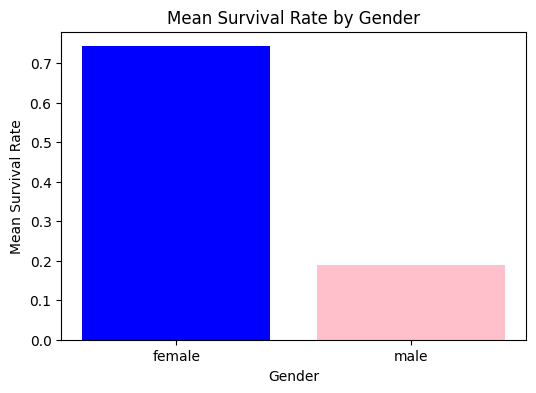

In [22]:
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/Data Set /Titanic-Dataset.csv')

# Calculate mean survival rates by gender
mean_survival_by_gender = df.groupby('Sex')['Survived'].mean()
print(f"Mean survival rate by gender:\n{mean_survival_by_gender}")

# Bar plot to show the mean survival rate by gender
plt.figure(figsize=(6, 4))
plt.bar(mean_survival_by_gender.index, mean_survival_by_gender.values, color=['blue', 'pink'])
plt.title('Mean Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels if needed
plt.show()

#Problem - 5:
Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Embarked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

Mean survival rate by gender and embarkation port:
Embarked         C         Q         S
Sex                                   
female    0.876712  0.750000  0.689655
male      0.305263  0.073171  0.174603


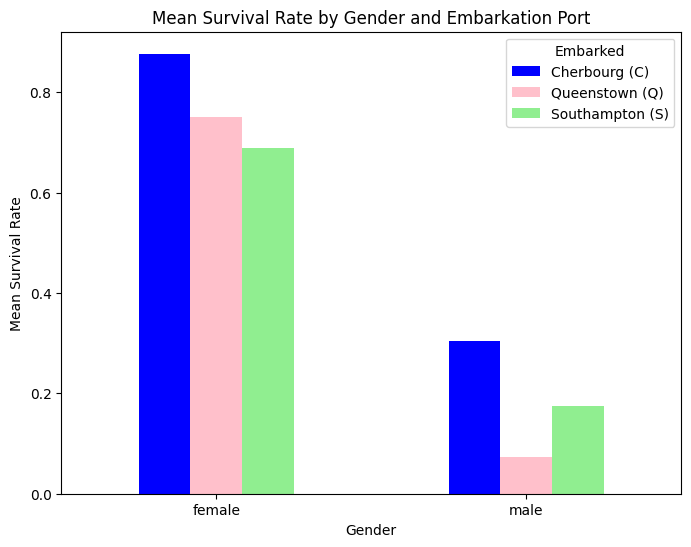

In [23]:
mean_survival_by_gender_and_embarked = df.groupby(['Sex', 'Embarked'])['Survived'].mean().unstack()
print(f"Mean survival rate by gender and embarkation port:\n{mean_survival_by_gender_and_embarked}")

# Bar plot to show the mean survival rate by gender and embarkation port
mean_survival_by_gender_and_embarked.plot(kind='bar', figsize=(8, 6), color=['blue', 'pink', 'lightgreen'])
plt.title('Mean Survival Rate by Gender and Embarkation Port')
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.xticks(rotation=0)  # Rotate x-axis labels to make them readable
plt.legend(title='Embarked', labels=['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'])
plt.show()

#Problem - 6{Optional}:
Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically

Mean survival rate by Pclass and Age Group:
AgeGroup        Q1        Q2        Q3        Q4        Q5
Pclass                                                    
1         0.809524  0.761905  0.666667  0.777778  0.506667
2         0.742857  0.400000  0.416667  0.461538  0.363636
3         0.333333  0.197674  0.283582  0.166667  0.088235


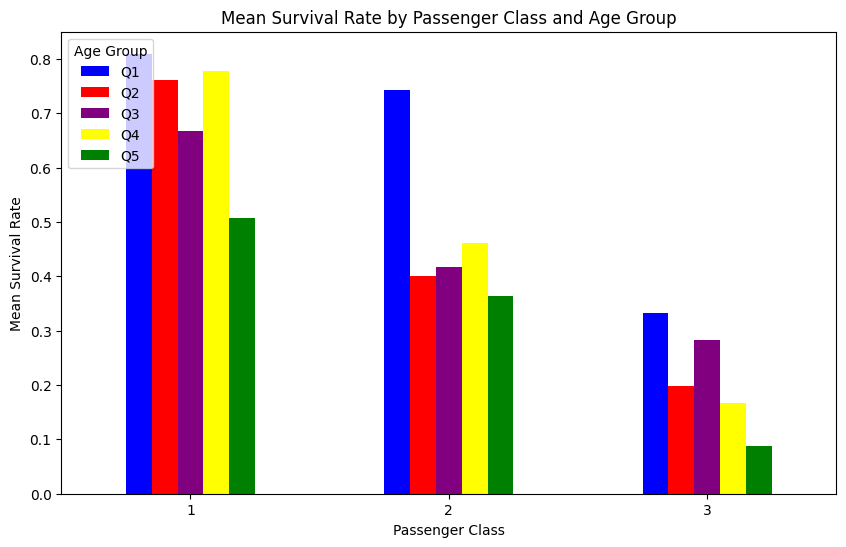

In [26]:
age_quantiles = pd.qcut(df['Age'], 5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
df['AgeGroup'] = age_quantiles

mean_survival_by_class_and_age = df.groupby(['Pclass', 'AgeGroup'], observed=False)['Survived'].mean().unstack()

print(f"Mean survival rate by Pclass and Age Group:\n{mean_survival_by_class_and_age}")

# Plot the mean survival rate by Pclass and Age Group
mean_survival_by_class_and_age.plot(kind='bar', figsize=(10, 6), color=['blue', 'red', 'purple', 'yellow', 'green'])
plt.title('Mean Survival Rate by Passenger Class and Age Group')
plt.xlabel('Passenger Class')
plt.ylabel('Mean Survival Rate')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Age Group', loc='upper left', labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
plt.show()